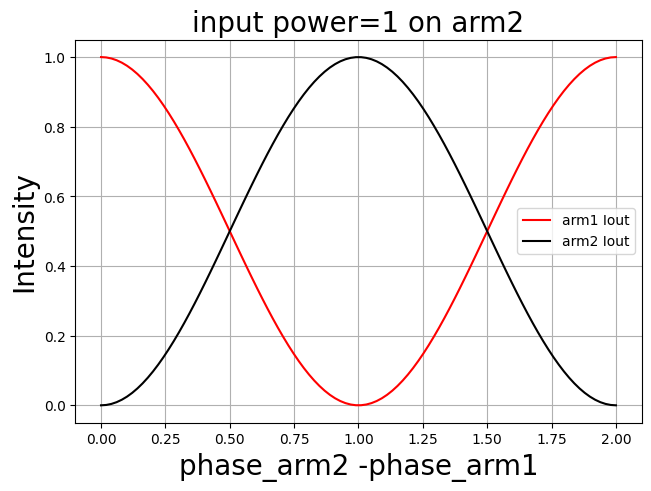

In [33]:
#reconstruct phase
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt

#calculate the field after first directional coupler
r=1/math.sqrt(2); #cross_coupling_coefficient for the directional coupler (0.707 is 1/sqrt(2)) 
t=math.sqrt(1-r**2); #optical_field_transmission
transfer_directional_coupler=np.matrix([[t,r*1j],[r*1j,t]]) #transfer matrix for directional coupler 3dB coupler

#setup the system
matrixs2=np.dot([0,1],transfer_directional_coupler); #incident on the 2nd arm

Ey_arm1_Ey_arm2=[matrixs2[0,0],matrixs2[0,1]];

#phase shifter %%%%% need to use rad in the matrix 
phase_angle_one=0; #arm1
#phase_angle_two=math.pi/2;
phase_angle_two=np.linspace(0,2*np.pi,100)  
I1,I2,theta1_array,theta2_array=[],[],[],[]
for i in range(len(phase_angle_two)):
    phase_shifter=np.matrix([[np.exp(1j*(phase_angle_one)),0],[0,np.exp(1j*(phase_angle_two[i]))]]);
    ######## setup the system
    matrixs3=Ey_arm1_Ey_arm2@phase_shifter@transfer_directional_coupler;

    #######results
    theta1=math.degrees(np.angle(matrixs3[0,0])); theta2=math.degrees(np.angle(matrixs3[0,1]));
    E1=abs(matrixs3[0,0]);
    E2=abs(matrixs3[0,1]);
    # E1_and_E2=[E1,E2]; 
    # I1_and_I2=[E1**2,E2**2];
    I1.append(E1**2)
    I2.append(E2**2)
    # I_diff=I1_and_I2[1]-I1_and_I2[0];
    # theta1_and_theta2=[theta1,theta2];
    theta1_array.append(theta1)
    theta2_array.append(theta2)
    # print('I_diff=',I_diff)
    # print('theta1_and_theta2=',theta1_and_theta2)
    # print('I1_and_I2=',I1_and_I2);

# fig = plt.figure(figsize=(10,4))
# fig,ax = plt.subplots()
# ax.plot(phase_angle_two[0:]/np.pi,I1[0:],color="red")
# ax.set_xlabel("phase of arm 2 in pi", fontsize = 10)
# ax.set_ylabel("I1",color="red",fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=10)
# ax2=ax.twinx()
# ax.plot(phase_angle_two[0:]/np.pi,I2[0:],color="blue")
# ax.set_xlabel("phase of arm 2 in pi", fontsize = 10)
# ax.set_ylabel("I2",color="red",fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=10)
# fig.set_figwidth(10)

size=20
figHandler, axHandler = plt.subplots(1, 1, layout='constrained')
plt.plot(phase_angle_two[0:]/np.pi, I1, 'r', label='arm1 Iout')
plt.plot(phase_angle_two[0:]/np.pi, I2, 'k', label='arm2 Iout')
plt.grid(True); plt.xlabel('phase_arm2 -phase_arm1',fontsize = size); plt.ylabel('Intensity',fontsize = size); 
plt.legend()
plt.title('input power=1 on arm2',fontsize = size)
plt.show()

def getMinMax(arr):
    arr.sort()
    minmax = {"min": arr[0], "max": arr[-1]}
    return minmax


In [6]:
n=np.linspace(1,10,10)
print(n)


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [29]:
# length_arm1=1031 #um
# length_arm2=1090 #um

#critital parameter: 
    #delta wl resolution is 0.1nm; 
    #maxmim length difference is 1500um;
    #length_diff resolution is nm

# approximation:
    #don't consider dispersion
    #

n_siN=1.9741
#need to find Neff for the two modes
neff1=1.8386 #for 1560.1
neff2=1.8379 #for 1562.1-1563.1 (1563.1)

#in fact since we need to scan the wavelength,we can see +0.002,+0.003 diffence, does it cause any neff difference
wl1_n=1.5601/neff1
delta_wl=np.linspace(0.002,0.003,11)
for i in range(len(delta_wl)):
    wl2_n=(1.5601+delta_wl[i])/neff2
    #wl1
    index=1e3 # maxmim length difference is 1500um

    n=np.linspace(1,index,int(index))
    length_diff_wl1=n*wl1_n
    length_diff_wl1_new = np.round(length_diff_wl1, decimals=3) #save to nm range

    m=np.linspace(1,index,int(index))
    length_diff_wl2=((2*m+1)/2)*wl2_n
    length_diff_wl2_new = np.round(length_diff_wl2, decimals=3)
    
    common_elements = set(length_diff_wl1_new) & set(length_diff_wl2_new)
    if common_elements:  # Check if the set is non-empty
        print("delta_wl="+str(round(delta_wl[i],4))+", wl2="+str(round(delta_wl[i],4)+1.5601)+",  length_diff:",common_elements)
        length_diff_wl1_in_pi=[2*round(x/wl1_n,2) for x in list(common_elements)]
        length_diff_wl2_in_pi=[2*round(x/wl2_n,2) for x in list(common_elements)]
        print("2n="+str(length_diff_wl1_in_pi)+", 2m+1="+str(length_diff_wl2_in_pi))

    # else:
    #     print("No common elements.")

# size=20
# #figHandler, axHandler = plt.subplots(1, 1, layout='constrained')
# plt.figure(figsize=(5,10))
# plt.plot(n, length_diff_wl1, 'r', marker='o',label='length_diff for wl1 to go bottom arm')
# plt.plot(m, length_diff_wl2, 'k', marker='o',label='length_diff for wl2 to go bottom ar')
# plt.grid(True); 
# plt.xlabel('index',fontsize = size); 
# plt.ylabel('length_diff',fontsize = size); 
# plt.legend(fontsize=10,loc='upper right')
# plt.tick_params(axis='both', which='major', labelsize=20)
# #plt.title('input power=1 on arm1',fontsize = size)
# plt.show()


# num_wl1=phase_diff_wl1//wl1
# num_wl2=phase_diff_wl2//wl2

# phase_wl1=num_wl1*np.pi*2
# phase_wl2=num_wl2*np.pi*2
# # length_arm1_new=num_arm1*wl_arm1
# # length_arm2_new=(num_arm2+1/2)*wl_arm2

# phase_arm1=(length_arm1_new/wl_arm1)*np.pi*2
# phase_arm2=(length_arm2_new/wl_arm2)*np.pi*2
# print("length_arm1 in um="+str(length_arm1_new))
# print("length_arm2 in um="+str(length_arm2_new))
# print("phase_arm1 in pi="+str(round(phase_arm1/np.pi,4)))
# print("phase_arm2 in pi="+str(round(phase_arm2/np.pi,4)))



delta_wl=0.002, wl2=1.5621,  length_diff: {766.219, 255.406}
2n=[1806.0, 602.0], 2m+1=[1803.0, 601.0]
delta_wl=0.0021, wl2=1.5622,  length_diff: {738.218, 246.073}
2n=[1740.0, 580.0], 2m+1=[1737.0, 579.0]
delta_wl=0.0023, wl2=1.5624,  length_diff: {229.102, 687.306}
2n=[540.0, 1620.0], 2m+1=[539.0, 1617.0]
delta_wl=0.0024, wl2=1.5625,  length_diff: {664.396, 221.465}
2n=[1566.0, 522.0], 2m+1=[1563.0, 521.0]
delta_wl=0.0025, wl2=1.5626,  length_diff: {643.183}
2n=[1516.0], 2m+1=[1513.0]
delta_wl=0.0026, wl2=1.5627,  length_diff: {622.818}
2n=[1468.0], 2m+1=[1465.0]
delta_wl=0.0027, wl2=1.5628,  length_diff: {604.151}
2n=[1424.0], 2m+1=[1421.0]
delta_wl=0.0028, wl2=1.5629,  length_diff: {586.332, 195.161}
2n=[1382.0, 460.0], 2m+1=[1379.0, 459.0]
delta_wl=0.0029, wl2=1.563,  length_diff: {569.361, 190.07}
2n=[1342.0, 448.0], 2m+1=[1339.0, 447.0]


In [21]:
array1 = [1, 2, 3, 4, 5]
array2 = [3,6]

common_elements = set(array1) & set(array2)
if common_elements:
    print(common_elements)

{3}
